# LeNet
## LMS에 웜톤 쿨톤압축파일 업로드, unzip한 후 적용
참고한 노드: exploration 가위바위보 노드

In [29]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## Step 1. 파일들 불러와 224*224로 resize

In [31]:
def resize_images(img_path):
#     images=glob.glob(img_path + "/*.jpg")  
    images = glob.glob(img_path + "/*.jpg") + glob.glob(img_path + "/*.JPG")
    print(len(images), " images to be resized.")

    # 파일마다 모두 224x224 사이즈로 바꾸어 저장
    target_size=(224,224)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

# 쿨톤 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/aiffelthon/warm_1"
resize_images(image_dir_path)

print("웜톤 이미지 resize 완료!")

490  images to be resized.
490  images resized.
웜톤 이미지 resize 완료!


In [32]:
# 쿨톤 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/aiffelthon/cool_1"
resize_images(image_dir_path)

print("쿨톤 이미지 resize 완료!")

186  images to be resized.
186  images resized.
쿨톤 이미지 resize 완료!


## Step 2. 웜톤 0, 쿨톤 1로 레이블링

In [39]:
def load_data(img_path, number_of_data=676):  # 웜톤 490 + 쿨톤 186
    # 웜톤 : 0, 쿨톤 : 1
    img_size=224
    color=3
    #이미지 데이터와 라벨(웜톤 : 0, 쿨톤 : 1) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    warm_files = list(glob.iglob(img_path + '/warm_1/*.jpg')) + list(glob.iglob(img_path + '/warm_1/*.JPG'))
    for file in warm_files:
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 웜톤 : 0
        idx=idx+1

    cool_files = list(glob.iglob(img_path + '/cool_1/*.jpg')) + list(glob.iglob(img_path + '/cool_1/*.JPG'))
    for file in cool_files:
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 쿨톤 : 1
        idx=idx+1  
    
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/aiffelthon"
(x_train, y_train)=load_data(image_dir_path)

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 676 입니다.
x_train shape: (676, 224, 224, 3)
y_train shape: (676,)


In [40]:
x_train[0]

array([[[192, 190, 191],
        [195, 193, 194],
        [197, 195, 196],
        ...,
        [180, 170, 168],
        [180, 170, 168],
        [180, 170, 168]],

       [[193, 191, 192],
        [194, 192, 193],
        [196, 194, 195],
        ...,
        [181, 171, 169],
        [181, 171, 169],
        [181, 171, 169]],

       [[195, 193, 194],
        [192, 190, 191],
        [190, 188, 189],
        ...,
        [182, 172, 170],
        [182, 172, 170],
        [182, 172, 170]],

       ...,

       [[184, 179, 173],
        [195, 190, 184],
        [207, 202, 196],
        ...,
        [231, 222, 213],
        [239, 230, 221],
        [222, 213, 204]],

       [[218, 213, 207],
        [209, 204, 198],
        [202, 197, 191],
        ...,
        [207, 198, 189],
        [228, 219, 210],
        [223, 214, 205]],

       [[200, 195, 189],
        [228, 223, 217],
        [213, 208, 202],
        ...,
        [222, 213, 204],
        [222, 213, 204],
        [213, 204, 195]]

In [42]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

라벨:  0


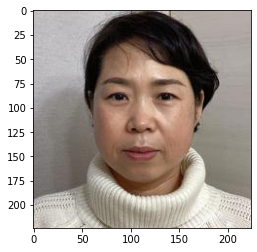

In [45]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## Step 3. train data, validation data 나누기, 정규화

In [46]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [47]:
x_train.shape

(676, 224, 224, 3)

In [48]:
y_train.shape

(676,)

In [49]:
from sklearn.model_selection import train_test_split

# x_train과 y_train을 훈련 세트와 검증 세트로 분할
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [50]:
x_train.shape

(405, 224, 224, 3)

In [51]:
x_val.shape

(271, 224, 224, 3)

In [52]:
y_train.shape

(405,)

In [53]:
y_val.shape

(271,)

In [56]:
x_train.dtype

dtype('int32')

In [57]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

In [58]:
x_train /= 255
x_val /= 255

In [59]:
x_val[0]

array([[[0.83137256, 0.78039217, 0.7058824 ],
        [0.8392157 , 0.7882353 , 0.7137255 ],
        [0.84705883, 0.79607844, 0.72156864],
        ...,
        [0.80784315, 0.7490196 , 0.6666667 ],
        [0.8       , 0.7411765 , 0.65882355],
        [0.78431374, 0.7254902 , 0.6431373 ]],

       [[0.83137256, 0.78039217, 0.7058824 ],
        [0.8392157 , 0.7882353 , 0.7137255 ],
        [0.84705883, 0.79607844, 0.72156864],
        ...,
        [0.80784315, 0.7490196 , 0.6666667 ],
        [0.8       , 0.7411765 , 0.65882355],
        [0.7882353 , 0.7294118 , 0.64705884]],

       [[0.827451  , 0.7764706 , 0.7019608 ],
        [0.8392157 , 0.7882353 , 0.7137255 ],
        [0.84705883, 0.79607844, 0.72156864],
        ...,
        [0.80784315, 0.7490196 , 0.6666667 ],
        [0.8       , 0.7411765 , 0.65882355],
        [0.7882353 , 0.7294118 , 0.64705884]],

       ...,

       [[0.08235294, 0.08627451, 0.09411765],
        [0.08235294, 0.08627451, 0.09411765],
        [0.07843138, 0

In [60]:
x_train.shape

(405, 224, 224, 3)

## Step 4. LeNet 모델 쌓기

In [ ]:
# LeNet 기본 모델
# 출처: https://www.datasciencecentral.com/lenet-5-a-classic-cnn-architecture/

model = Sequential()
model.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(224,224,3), padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [82]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=["accuracy"])

### 예시는 mnist 10개 클래스 분류라.. 웜톤 쿨톤 이진 분류에 맞게 수정

In [85]:
model = Sequential()
model.add(layers.Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(224,224,3), padding="same"))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(layers.Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(layers.Conv2D(120, kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
# 마지막 레이어의 뉴런수 1개, 활성화함수는 시그모이드로 변경

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 224, 224, 6)       456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 223, 223, 6)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 219, 219, 16)      2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 109, 109, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 105, 105, 120)     48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1323000)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [87]:
# 손실함수 binary_crossentropy로 수정함
model.compile(loss=keras.losses.binary_crossentropy, optimizer='SGD', metrics=["accuracy"])

## 시도 1. epochs = 10, batch_size=128

In [88]:
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose=1)

Epoch 1/10
4/4 [==============================] - 7s 732ms/step - loss: 2.5659 - accuracy: 0.7086 - val_loss: 2.5322 - val_accuracy: 0.7491
Epoch 2/10
4/4 [==============================] - 1s 314ms/step - loss: 2.7844 - accuracy: 0.7086 - val_loss: 2.1779 - val_accuracy: 0.7491
Epoch 3/10
4/4 [==============================] - 1s 319ms/step - loss: 2.4293 - accuracy: 0.7086 - val_loss: 1.8892 - val_accuracy: 0.7491
Epoch 4/10
4/4 [==============================] - 1s 311ms/step - loss: 2.1118 - accuracy: 0.7086 - val_loss: 1.6222 - val_accuracy: 0.7491
Epoch 5/10
4/4 [==============================] - 1s 314ms/step - loss: 1.8063 - accuracy: 0.7086 - val_loss: 1.3784 - val_accuracy: 0.7491
Epoch 6/10
4/4 [==============================] - 1s 313ms/step - loss: 1.5182 - accuracy: 0.7086 - val_loss: 1.1128 - val_accuracy: 0.7491
Epoch 7/10
4/4 [==============================] - 1s 324ms/step - loss: 1.2193 - accuracy: 0.7086 - val_loss: 0.8994 - val_accuracy: 0.7491
Epoch 8/10
4/4 [====

In [89]:
test_score=model.evaluate(x_val, y_val)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1]*100))

9/9 [==============================] - 1s 29ms/step - loss: 0.5844 - accuracy: 0.7491
Test loss 0.5844, accuracy 74.91%


## 시도 2. epochs = 30, batch_size=128

In [90]:
hist = model.fit(x=x_train, y=y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val), verbose=1)

Epoch 1/30
4/4 [==============================] - 2s 428ms/step - loss: 0.6375 - accuracy: 0.7086 - val_loss: 0.5646 - val_accuracy: 0.7491
Epoch 2/30
4/4 [==============================] - 1s 311ms/step - loss: 0.6111 - accuracy: 0.7086 - val_loss: 0.5639 - val_accuracy: 0.7491
Epoch 3/30
4/4 [==============================] - 1s 313ms/step - loss: 0.6045 - accuracy: 0.7086 - val_loss: 0.5653 - val_accuracy: 0.7491
Epoch 4/30
4/4 [==============================] - 1s 311ms/step - loss: 0.6038 - accuracy: 0.7086 - val_loss: 0.5652 - val_accuracy: 0.7491
Epoch 5/30
4/4 [==============================] - 1s 313ms/step - loss: 0.6040 - accuracy: 0.7086 - val_loss: 0.5664 - val_accuracy: 0.7491
Epoch 6/30
4/4 [==============================] - 1s 311ms/step - loss: 0.6041 - accuracy: 0.7086 - val_loss: 0.5713 - val_accuracy: 0.7491
Epoch 7/30
4/4 [==============================] - 1s 311ms/step - loss: 0.6043 - accuracy: 0.7086 - val_loss: 0.5754 - val_accuracy: 0.7491
Epoch 8/30
4/4 [====

In [91]:
test_score=model.evaluate(x_val, y_val)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1]*100))

9/9 [==============================] - 0s 35ms/step - loss: 0.5689 - accuracy: 0.7491
Test loss 0.5689, accuracy 74.91%


## 시도 3. epochs = 30, batch_size=64

In [92]:
hist = model.fit(x=x_train, y=y_train, epochs=30, batch_size=64, validation_data=(x_val, y_val), verbose=1)

Epoch 1/30
7/7 [==============================] - 3s 243ms/step - loss: 0.6040 - accuracy: 0.7086 - val_loss: 0.5692 - val_accuracy: 0.7491
Epoch 2/30
7/7 [==============================] - 1s 191ms/step - loss: 0.6046 - accuracy: 0.7086 - val_loss: 0.5757 - val_accuracy: 0.7491
Epoch 3/30
7/7 [==============================] - 1s 180ms/step - loss: 0.6063 - accuracy: 0.7086 - val_loss: 0.5654 - val_accuracy: 0.7491
Epoch 4/30
7/7 [==============================] - 1s 182ms/step - loss: 0.6040 - accuracy: 0.7086 - val_loss: 0.5667 - val_accuracy: 0.7491
Epoch 5/30
7/7 [==============================] - 1s 183ms/step - loss: 0.6039 - accuracy: 0.7086 - val_loss: 0.5708 - val_accuracy: 0.7491
Epoch 6/30
7/7 [==============================] - 1s 182ms/step - loss: 0.6041 - accuracy: 0.7086 - val_loss: 0.5663 - val_accuracy: 0.7491
Epoch 7/30
7/7 [==============================] - 1s 182ms/step - loss: 0.6037 - accuracy: 0.7086 - val_loss: 0.5677 - val_accuracy: 0.7491
Epoch 8/30
7/7 [====

In [89]:
test_score=model.evaluate(x_val, y_val)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1]*100))

9/9 [==============================] - 1s 29ms/step - loss: 0.5844 - accuracy: 0.7491
Test loss 0.5844, accuracy 74.91%


## Step 5. 한 줄 정리

시도 1. epochs = 10, batch_size=128
loss: 0.5844 - accuracy: 0.7491
        
**시도 2. epochs = 30, batch_size=128
loss: 0.5689 - accuracy: 0.7491**

시도 3. epochs = 30, batch_size=64
loss: 0.5844 - accuracy: 0.7491